In [6]:
import sqlite3
import matplotlib.pyplot as plt
import haversine as hs
import pandas as pd
import numpy as np
from math import sqrt, pow
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import splines
from sklearn.metrics import mean_squared_error


In [3]:
def f(x):
    t_flat, t_flong, a_flat, a_flong = x[0], x[1], x[2], x[3]
    return sqrt(pow(12.36,2) + pow(hs.haversine((t_flat, t_flong), (a_flat, a_flong), unit=hs.Unit.METERS),2))

def g(df):
    df['distance'] = df.iloc[:, 2:6].apply(f, axis=1)
    return df.drop(columns=['T_FLAT', 'T_FLONG', 'A_FLAT', 'A_FLONG'])

<AxesSubplot:title={'center':'RSSI-to-distance model'}, xlabel='distance', ylabel='RSSI (dBm)'>

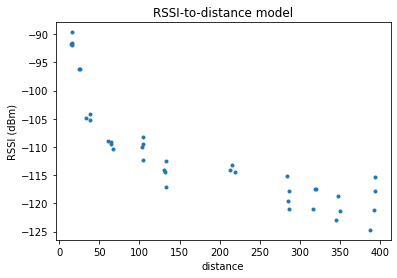

In [4]:
conn = sqlite3.connect("C:\\School\\rssi_ranging\\data_analysis\\rssi_1.db")
rssi_1_exp4 = g(pd.read_sql("SELECT * from exp4", conn))
rssi_1_exp5 = g(pd.read_sql("SELECT * FROM exp5", conn))
rssi_1_exp6 = g(pd.read_sql("SELECT * FROM exp6", conn))


conn = sqlite3.connect("C:\\School\\rssi_ranging\\data_analysis\\rssi_2.db")
rssi_2_exp4 = g(pd.read_sql("SELECT * from exp4", conn))
rssi_2_exp6 = g(pd.read_sql("SELECT * FROM exp6", conn))


conn = sqlite3.connect("C:\\School\\rssi_ranging\\data_analysis\\rssi_3.db")
rssi_3_exp4 = g(pd.read_sql("SELECT * from exp4", conn))
rssi_3_exp6 = g(pd.read_sql("SELECT * FROM exp6", conn))

conn = sqlite3.connect("C:\\School\\rssi_ranging\\data_analysis\\other_rssi.db")
rssi_1_exp3 = pd.read_sql("SELECT * from exp3", conn)
rssi_1_exp3['distance'] = rssi_1_exp3.iloc[:, 1]
rssi_1_exp3 = rssi_1_exp3.drop(columns=['FLAT', 'FLONG', 'Dist', 'ID'])


df = pd.concat([
#     rssi_1_exp4,
#     rssi_1_exp5,
#     rssi_1_exp6,
#     rssi_2_exp4,
#     rssi_2_exp6,
#     rssi_3_exp4,
    rssi_3_exp6
]).sort_values(by=['distance'], ignore_index=True).groupby('distance')['RSSI'].mean()
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")
df.plot(style=".")
# plt.semilogx()


[]

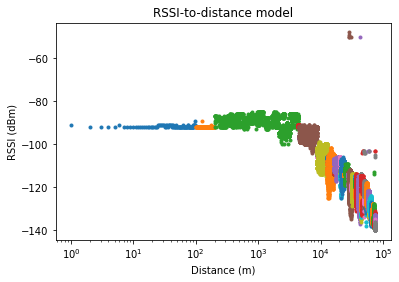

In [29]:
df = pd.concat([
    rssi_3_exp4,
    rssi_3_exp6
]).sort_values(by=['distance'], ignore_index=True).groupby('distance')['RSSI'].mean()
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")
df.plot(style=".")
plt.semilogx()

[]

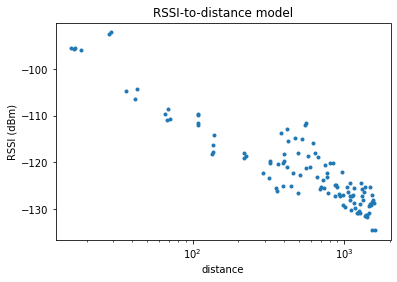

In [4]:
df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp6
]).sort_values(by=['distance'], ignore_index=True).groupby('distance')['RSSI'].mean()
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")
df.plot(style=".")
plt.semilogx()

In [5]:
.mean()df = pd.concat([
    rssi_2_exp4,
    rssi_2_exp6
]).sort_values(by=['distance'], ignore_index=True).groupby('distance')['RSSI'].mean()
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")
df.plot(style=".")
plt.semilogx()

SyntaxError: invalid syntax (<ipython-input-5-a165473f186f>, line 1)

NameError: name 'xn' is not defined

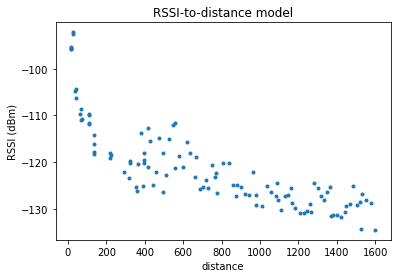

In [6]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")

df.plot(style='.')

d, rssi = df.index.tolist(), df.values.tolist()
popt = np.polyfit(d, rssi, 2)
# xn = np.linspace(min(d), max(d), len(d))
# yn = np.polyval(popt, xn)
plt.plot(xn, yn)
plt.semilogx()

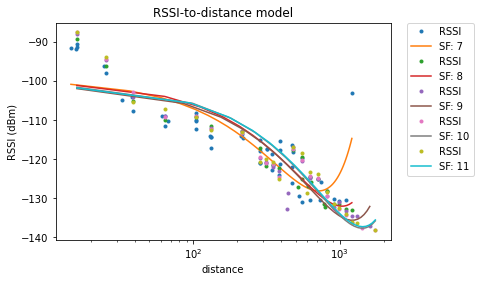

In [7]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")

df = pd.concat([rssi_3_exp4, rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

for sf in range(7,12):
    df2 = df.loc[df['SF'] == sf].groupby('distance')['RSSI'].mean()
    df2.plot(style='.')

    d, rssi = df2.index.tolist(), df2.values.tolist()
    popt = np.polyfit(d, rssi, 2)
    xn = np.linspace(min(d), max(d), len(d))
    yn = np.polyval(popt, xn)
    plt.plot(xn, yn, label="SF: " + str(sf))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.semilogx()




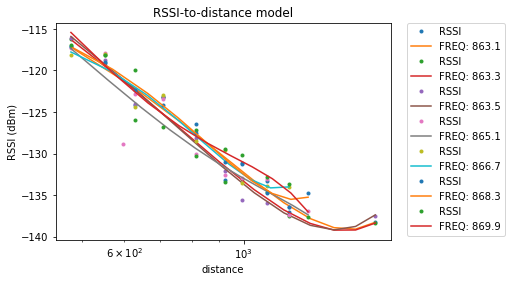

In [86]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")
df = pd.concat([rssi_3_exp4]).sort_values(by=['distance'], ignore_index=True)
for freq in sorted(df.FREQ.unique()):
#     for sf in range(7,12):
        df2 = df.loc[(df['FREQ'] == freq) & (df['SF'] == 11)].groupby('distance')['RSSI'].mean()
        df2.plot(style='.')

        d, rssi = df2.index.tolist(), df2.values.tolist()
        popt = np.polyfit(d, rssi, 3)
        xn = np.linspace(min(d), max(d), len(d))
        yn = np.polyval(popt, xn)
        plt.plot(xn, yn, label="FREQ: " + str(freq))
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.semilogx()


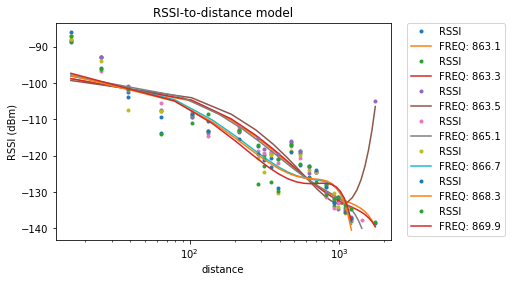

In [16]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")
df = pd.concat([rssi_3_exp4, rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)
for freq in sorted(df.FREQ.unique()):
#     for sf in range(7,12):
        df2 = df.loc[(df['FREQ'] == freq) & (df['SF'] == 10)].groupby('distance')['RSSI'].mean()
        df2.plot(style='.')

        d, rssi = df2.index.tolist(), df2.values.tolist()
        popt = np.polyfit(d, rssi, 3)
        xn = np.linspace(min(d), max(d), len(d))
        yn = np.polyval(popt, xn)
        plt.plot(xn, yn, label="FREQ: " + str(freq))
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.semilogx()

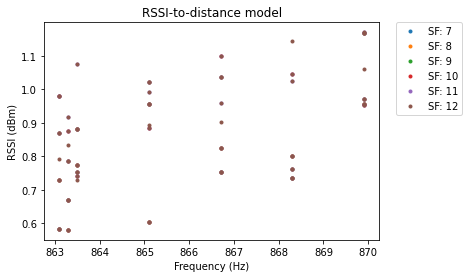

In [84]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Frequency (Hz)")
df = pd.concat([rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)
a = []
b = []
for sf in range(7,13):
    for freq in sorted(df.FREQ.unique()):
        b.append(freq)
        a.append(df.loc[(df['FREQ'] == freq) & (df['SF'] == sf)].groupby('distance')['SNR'].std().mean())
    df2 = pd.Series(a, index=b)
    df2.plot(style='.', label="SF: " + str(sf))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


<AxesSubplot:title={'center':'RSSI-to-distance model'}, xlabel='Frequency (Hz)', ylabel='RSSI (dBm)'>

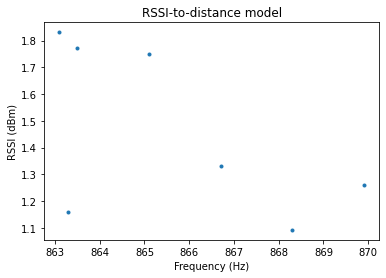

In [8]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Frequency (Hz)")
df = pd.concat([rssi_3_exp4]).sort_values(by=['distance'], ignore_index=True)
a = []
b = []
for freq in sorted(df.FREQ.unique()):
    b.append(freq)
    d = df.loc[df['FREQ'] == freq].groupby('distance')['RSSI']
    #pr#int(len(d))
    a.append(d.std().mean())
df2 = pd.Series(a, index=b)
df2.plot(style='.')

<AxesSubplot:title={'center':'RSSI-to-distance model'}, xlabel='Frequency (Hz)', ylabel='RSSI (dBm)'>

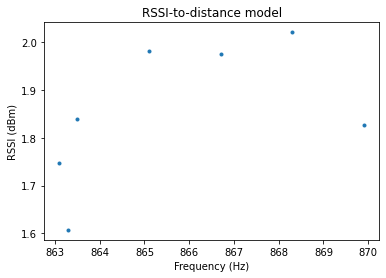

In [9]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Frequency (Hz)")
df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)
a = []
b = []
for freq in sorted(df.FREQ.unique()):
    b.append(freq)
    a.append(df.loc[df['FREQ'] == freq].groupby('distance')['RSSI'].std().mean())
df2 = pd.Series(a, index=b)
df2.plot(style='.')

<AxesSubplot:title={'center':'Standard deviation of RSSI vs distance'}, xlabel='distance', ylabel='Standard deviation RSSI'>

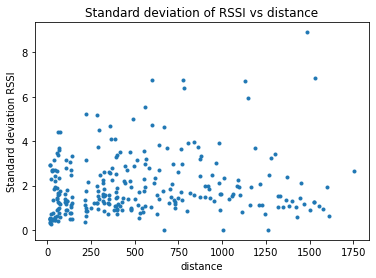

In [10]:
plt.title("Standard deviation of RSSI vs distance")
plt.ylabel("Standard deviation RSSI")
plt.xlabel("Frequency (Hz)")

df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)
df2 = df.groupby('distance')['RSSI']
df2 = df2.std()
df2.plot(style='.')

<AxesSubplot:title={'center':'Mean value of SNR vs distance'}, xlabel='distance', ylabel='Mean value SNR'>

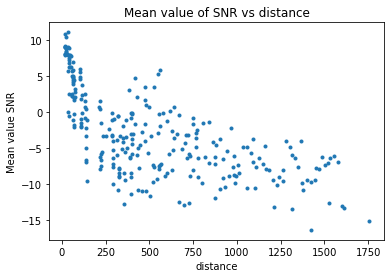

In [11]:
plt.title("Mean value of SNR vs distance")
plt.ylabel("Mean value SNR")
plt.xlabel("Distance (m)")

df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)
df2 = df.groupby('distance')['SNR']
df2 = df2.mean()
df2.plot(style='.')

<AxesSubplot:title={'center':'Standard deviation of RSSI vs distance'}, xlabel='distance', ylabel='Standard deviation RSSI'>

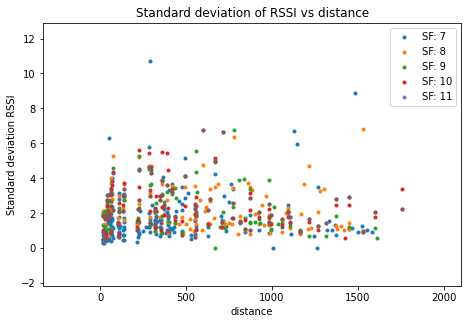

In [44]:
plt.title("Standard deviation of RSSI vs distance")
plt.ylabel("Standard deviation RSSI")
plt.xlabel("Distance (m)")

df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

for sf in [7, 8, 9, 10, 11]:
    df2 = df.loc[(df['SF'] == sf) & (sf != 12)].groupby('distance')['RSSI']
    df2 = df2.std()
    df2.plot(style=".", figsize=(7.5, 5), label=("SF: " + str(sf)))
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
df2.plot(style='.')

104
33
33
33
33
9


<AxesSubplot:title={'center':'Standard deviation of RSSI vs distance'}, xlabel='distance', ylabel='Standard deviation RSSI'>

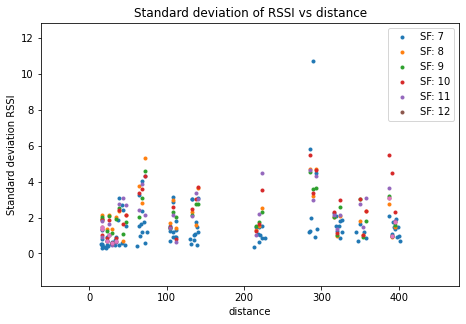

In [71]:
plt.title("Standard deviation of RSSI vs distance")
plt.ylabel("Standard deviation RSSI")
plt.xlabel("Distance (m)")

df = pd.concat([
#     rssi_1_exp4,
#     rssi_1_exp5,
    rssi_1_exp6,
#     rssi_2_exp4,
    rssi_2_exp6,
#     rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

for sf in sorted(df.SF.unique()):
    df2 = df.loc[(df['SF'] == sf)].groupby('distance')['RSSI']
    df2 = df2.std()
    print(len(df2))
    df2.plot(style=".", figsize=(7.5, 5), label=("SF: " + str(sf)))
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
df2.plot(style='.')

        RSSI  SNR   FREQ  SF     distance
0       -117    1  863.3   8   223.454100
1       -133  -10  868.3   9   223.454100
2       -133  -10  868.3   9   223.454100
3       -133  -10  868.3   9   223.454100
4       -132   -9  868.3   9   223.454100
...      ...  ...    ...  ..          ...
113030  -138  -15  863.1  11  1754.004439
113031  -139  -16  863.1  11  1754.004439
113032  -105    8  863.5  10  1754.004439
113033  -137  -14  863.1  11  1754.004439
113034  -138  -15  863.5  11  1754.004439

[113035 rows x 5 columns]


<AxesSubplot:title={'center':'RSSI-to-distance model'}, xlabel='distance', ylabel='RSSI (dBm)'>

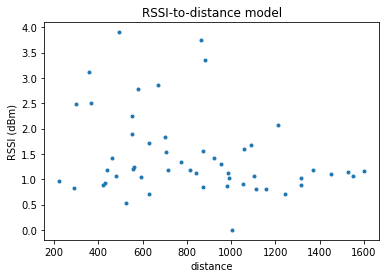

In [13]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Frequency (Hz)")
df = pd.concat([rssi_1_exp4, rssi_2_exp4, rssi_3_exp4]).sort_values(by=['distance'], ignore_index=True)
print(df)
df2 = df.loc[df['FREQ'] == freq].groupby('distance')['RSSI']
# for leng in sorted(df.distance.unique()):
#     d = df.loc[(df['FREQ'] == freq) & (df['distance' == leng])].groupby('FREQ')['RSSI']
#     print(len(d))
    
df2 = df2.std()
df2.plot(style='.')

        RSSI  SNR   FREQ  SF     distance
0       -117    1  863.3   8   223.454100
1       -133  -10  868.3   9   223.454100
2       -133  -10  868.3   9   223.454100
3       -133  -10  868.3   9   223.454100
4       -132   -9  868.3   9   223.454100
...      ...  ...    ...  ..          ...
113030  -138  -15  863.1  11  1754.004439
113031  -139  -16  863.1  11  1754.004439
113032  -105    8  863.5  10  1754.004439
113033  -137  -14  863.1  11  1754.004439
113034  -138  -15  863.5  11  1754.004439

[113035 rows x 5 columns]


<AxesSubplot:title={'center':'RSSI-to-distance model'}, xlabel='distance', ylabel='RSSI (dBm)'>

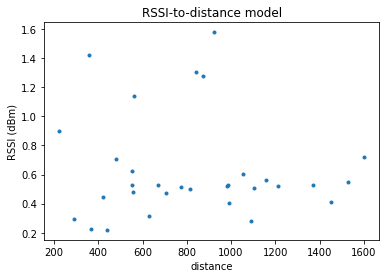

In [14]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Frequency (Hz)")
df = pd.concat([rssi_1_exp4, rssi_2_exp4, rssi_3_exp4]).sort_values(by=['distance'], ignore_index=True)
print(df)
df2 = df.loc[(df['FREQ'] == 869.9) & (df['SF'] == 10)].groupby('distance')['SNR']
# for leng in sorted(df.distance.unique()):
#     d = df.loc[(df['FREQ'] == freq) & (df['distance' == leng])].groupby('FREQ')['RSSI']
#     print(len(d))
    
df2 = df2.std()
df2.plot(style='.')

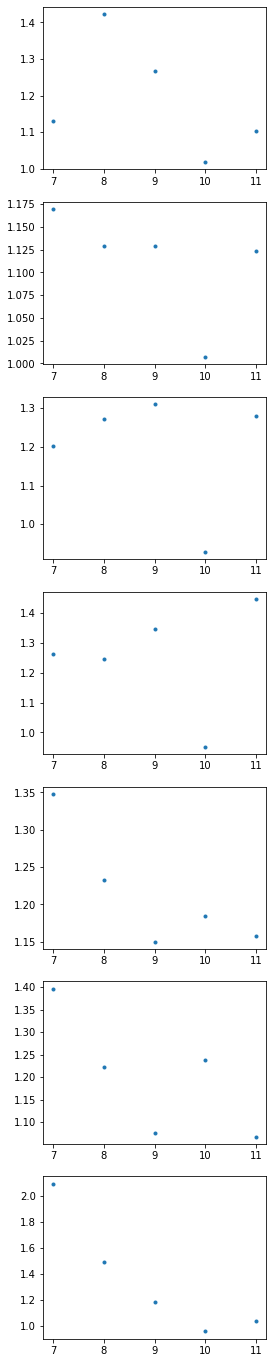

In [141]:
# plt.title("RSSI-to-distance model")
# plt.ylabel("RSSI (dBm)")
# plt.xlabel("Frequency (Hz)")
df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

freqs = sorted(df.FREQ.unique())
figure, axes = plt.subplots(7,1, figsize=(4,len(freqs)*3.5))
for i in range(len(freqs)):
    a = []
    b = []
    for sf in sorted(df.SF.unique()):
        b.append(sf)
        d = df.loc[(df['SF'] == sf) & (df['FREQ'] == freqs[i]) & (sf != 12)].groupby('distance')['RSSI']
        a.append(d.std().mean())
    df2 = pd.Series(a, index=b)
    df2.plot(ax=axes[i], style='.')
# df2.plot(ax=axes[i], style='.')

207
115
91
74
77
14


<AxesSubplot:title={'center':'RSSI-to-distance model'}, xlabel='Frequency (Hz)', ylabel='RSSI (dBm)'>

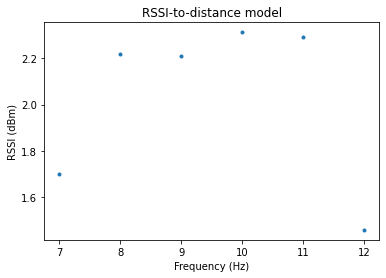

In [15]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Frequency (Hz)")
df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)
a = []
b = []
for sf in sorted(df.SF.unique()):
    b.append(sf)
    d = df.loc[(df['SF'] == sf)].groupby('distance')['RSSI']
    print(len(d))
    a.append(d.std().mean())
df2 = pd.Series(a, index=b)
df2.plot(style='.')

36
11
11
11
11
3


<AxesSubplot:title={'center':'RSSI-to-distance model'}, xlabel='Frequency (Hz)', ylabel='RSSI (dBm)'>

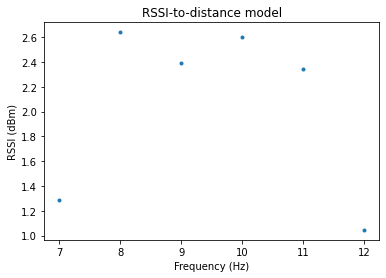

In [16]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Frequency (Hz)")
df = pd.concat([rssi_2_exp6]).sort_values(by=['distance'], ignore_index=True)
a = []
b = []
for sf in sorted(df.SF.unique()):
    b.append(sf)
    d = df.loc[(df['SF'] == sf)].groupby('distance')['RSSI']
    print(len(d))
    a.append(d.std().mean())
df2 = pd.Series(a, index=b)
df2.plot(style='.')

('10 863.5', 0.9288191369339037, 70) ('10 865.1', 0.9519262037576772, 71) ('10 869.9', 0.9581549102259844, 69)


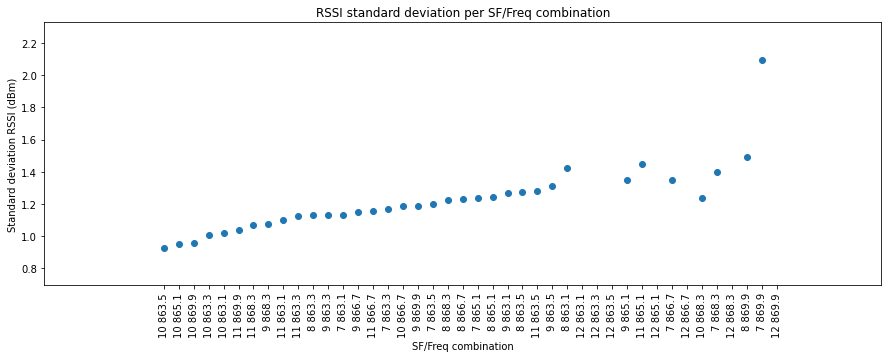

In [17]:

df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

freqs = sorted(df.FREQ.unique())
plt.title("RSSI standard deviation per SF/Freq combination")
plt.ylabel("Standard deviation RSSI (dBm)")
plt.xlabel("SF/Freq combination")
a = []
b = []
c = []
for i in range(len(freqs)):
    for sf in sorted(df.SF.unique()):
        d = df.loc[(df['SF'] == sf) & (df['FREQ'] == freqs[i]) & (sf != 12)].groupby('distance')['RSSI']
        c.append((str(sf) + " " + str(freqs[i]), d.std().mean(), len(d),))
c = sorted(c, key= lambda x: x[1])
a, b, e = list(map(list, zip(*c)))
print(c[0], c[1], c[2])
df2 = pd.Series(b, index=a)
p = df2.plot(style="o", figsize=(15, 5))
plt.xticks(list(range(len(a))), a, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)


('10 863.5', 0.7218788007369895, 70) ('10 869.9', 0.7224908467063687, 69) ('8 863.3', 0.7311300516284016, 72)


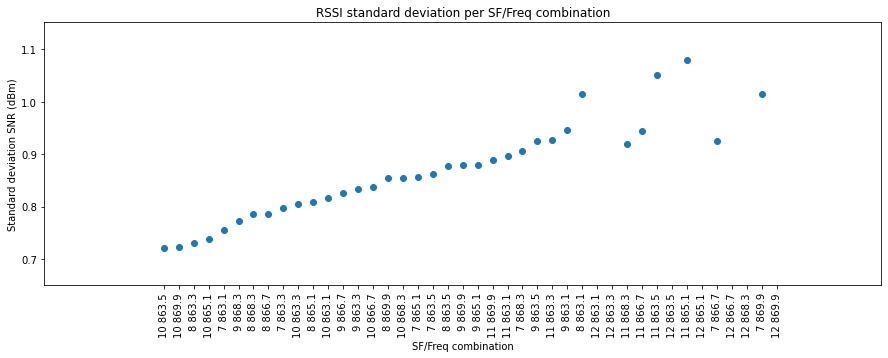

In [18]:

df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

freqs = sorted(df.FREQ.unique())
plt.title("RSSI standard deviation per SF/Freq combination")
plt.ylabel("Standard deviation SNR (dBm)")
plt.xlabel("SF/Freq combination")
a = []
b = []
c = []
for i in range(len(freqs)):
    for sf in sorted(df.SF.unique()):
        d = df.loc[(df['SF'] == sf) & (df['FREQ'] == freqs[i]) & (sf != 12)].groupby('distance')['SNR']
        c.append((str(sf) + " " + str(freqs[i]), d.std().mean(), len(d),))
c = sorted(c, key= lambda x: x[1])
a, b, e = list(map(list, zip(*c)))
print(c[0], c[1], c[2])
df2 = pd.Series(b, index=a)
p = df2.plot(style="o", figsize=(15, 5))
plt.xticks(list(range(len(a))), a, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

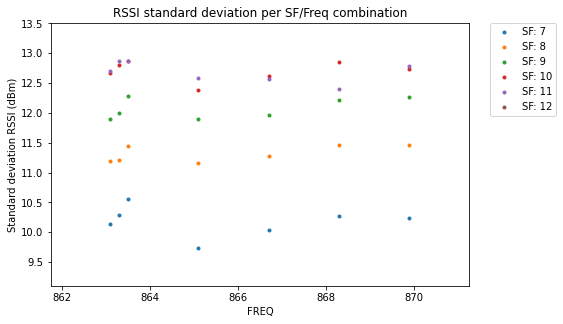

In [58]:

df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

plt.title("RSSI standard deviation per SF/Freq combination")
plt.ylabel("Standard deviation RSSI (dBm)")
plt.xlabel("SF/Freq combination")
for sf in sorted(df.SF.unique()):
    d = df.loc[(df['SF'] == sf) & (sf != 12)].groupby('FREQ')['RSSI'].std()
    d.plot(style=".", figsize=(7.5, 5), label=("SF: " + str(sf)))
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



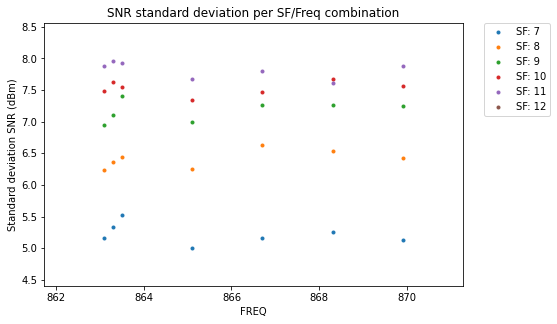

In [59]:

df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

plt.title("SNR standard deviation per SF/Freq combination")
plt.ylabel("Standard deviation SNR (dBm)")
plt.xlabel("SF/Freq combination")
for sf in sorted(df.SF.unique()):
    d = df.loc[(df['SF'] == sf) & (sf != 12)].groupby('FREQ')['SNR'].std()
    d.plot(style=".", figsize=(7.5, 5), label=("SF: " + str(sf)))
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

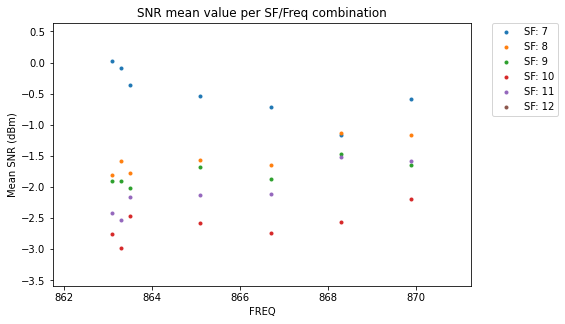

In [60]:

df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

plt.title("SNR mean value per SF/Freq combination")
plt.ylabel("Mean SNR (dBm)")
plt.xlabel("SF/Freq combination")
for sf in sorted(df.SF.unique()):
    d = df.loc[(df['SF'] == sf) & (sf != 12)].groupby('FREQ')['SNR'].mean()
    d.plot(style=".", figsize=(7.5, 5), label=("SF: " + str(sf)))
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

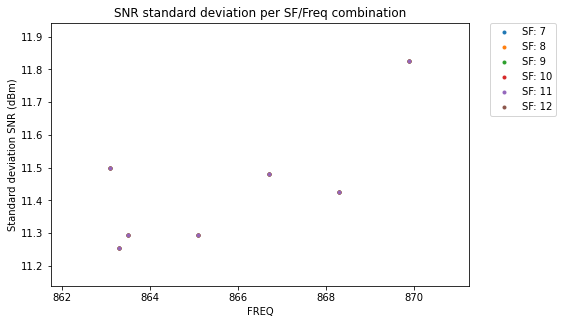

In [24]:

df = pd.concat([
#     rssi_1_exp4,
#     rssi_1_exp5,
#     rssi_1_exp6,
#     rssi_2_exp4,
#     rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

plt.title("SNR standard deviation per SF/Freq combination")
plt.ylabel("Standard deviation SNR (dBm)")
plt.xlabel("SF/Freq combination")
for sf in sorted(df.SF.unique()):
    d = df.loc[(df['SF'] == 8) & (sf != 12)].groupby('FREQ')['RSSI'].std()
    d.plot(style=".", figsize=(7.5, 5), label=("SF: " + str(sf)))
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

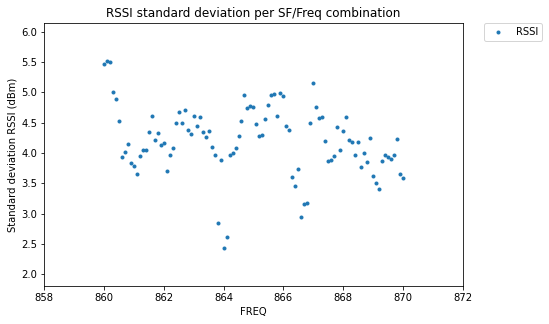

In [28]:

df = pd.concat([
    rssi_1_exp3]).sort_values(by=['distance'], ignore_index=True)

freqs = sorted(df.FREQ.unique())
plt.title("RSSI standard deviation per SF/Freq combination")
plt.ylabel("Standard deviation RSSI (dBm)")
plt.xlabel("SF/Freq combination")
d = df.groupby('FREQ')['RSSI'].std()
d.plot(style=".", figsize=(7.5, 5))
#df2 = pd.Series(b)
#p = df2.plot(style="o", figsize=(15, 5))
# plt.xticks(list(range(len(a))), a, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

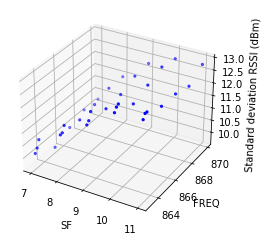

In [90]:
df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)


# for i in range(len(freqs)):
#     for sf in sorted(df.SF.unique()):
d = df.where(df['SF'] != 12).groupby(['FREQ', 'SF'])['RSSI'].std()
d.columns = ['FREQ', 'SF', 'RSSI']
d = d.reset_index()
        
x = d['SF']
y = d['FREQ']
z = d['RSSI']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='.')
ax.set_xlabel("SF")
ax.set_ylabel("FREQ")
ax.set_zlabel("Standard deviation RSSI (dBm)")
plt.show()

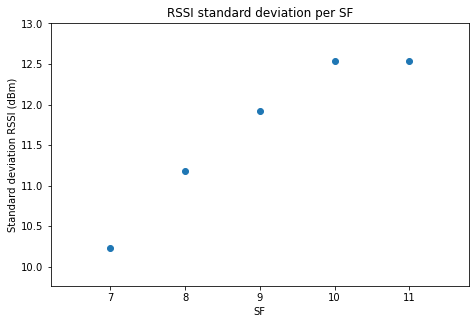

In [6]:

df = pd.concat([
    rssi_1_exp4,
#     rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6
]).sort_values(by=['distance'], ignore_index=True)

plt.title("RSSI standard deviation per SF")
plt.ylabel("Standard deviation RSSI (dBm)")
plt.xlabel("SF")
df = df.where(df['SF'] != 12).groupby('SF')['RSSI'].std()
df.plot(style="o", figsize=(7.5, 5))
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


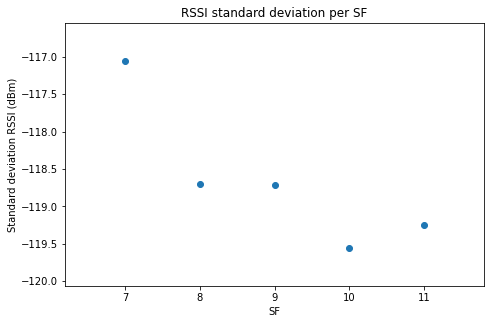

In [7]:

df = pd.concat([
    rssi_1_exp4,
#     rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6
]).sort_values(by=['distance'], ignore_index=True)

plt.title("RSSI standard deviation per SF")
plt.ylabel("Standard deviation RSSI (dBm)")
plt.xlabel("SF")
df = df.where(df['SF'] != 12).groupby('SF')['RSSI'].mean()
df.plot(style="o", figsize=(7.5, 5))
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


In [14]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


def get_natural_cubic_spline_model(x, y, minval=None, maxval=None, n_knots=None, knots=None):
    """
    Get a natural cubic spline model for the data.

    For the knots, give (a) `knots` (as an array) or (b) minval, maxval and n_knots.

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.

    Parameters
    ----------
    x: np.array of float
        The input data
    y: np.array of float
        The outpur data
    minval: float
        Minimum of interval containing the knots.
    maxval: float
        Maximum of the interval containing the knots.
    n_knots: positive integer
        The number of knots to create.
    knots: array or list of floats
        The knots.

    Returns
    --------
    model: a model object
        The returned model will have following method:
        - predict(x):
            x is a numpy array. This will return the predicted y-values.
    """

    if knots:
        spline = NaturalCubicSpline(knots=knots)
    else:
        spline = NaturalCubicSpline(max=maxval, min=minval, n_knots=n_knots)

    p = Pipeline([
        ('nat_cubic', spline),
        ('regression', LinearRegression(fit_intercept=True))
    ])

    p.fit(x, y)

    return p


class AbstractSpline(BaseEstimator, TransformerMixin):
    """Base class for all spline basis expansions."""

    def __init__(self, max=None, min=None, n_knots=None, n_params=None, knots=None):
        if knots is None:
            if not n_knots:
                n_knots = self._compute_n_knots(n_params)
            knots = np.linspace(min, max, num=(n_knots + 2))[1:-1]
            max, min = np.max(knots), np.min(knots)
        self.knots = np.asarray(knots)

    @property
    def n_knots(self):
        return len(self.knots)

    def fit(self, *args, **kwargs):
        return self


class NaturalCubicSpline(AbstractSpline):
    """Apply a natural cubic basis expansion to an array.
    The features created with this basis expansion can be used to fit a
    piecewise cubic function under the constraint that the fitted curve is
    linear *outside* the range of the knots..  The fitted curve is continuously
    differentiable to the second order at all of the knots.
    This transformer can be created in two ways:
      - By specifying the maximum, minimum, and number of knots.
      - By specifying the cutpoints directly.

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.
    Parameters
    ----------
    min: float
        Minimum of interval containing the knots.
    max: float
        Maximum of the interval containing the knots.
    n_knots: positive integer
        The number of knots to create.
    knots: array or list of floats
        The knots.
    """

    def _compute_n_knots(self, n_params):
        return n_params

    @property
    def n_params(self):
        return self.n_knots - 1

    def transform(self, X, **transform_params):
        X_spl = self._transform_array(X)
        if isinstance(X, pd.Series):
            col_names = self._make_names(X)
            X_spl = pd.DataFrame(X_spl, columns=col_names, index=X.index)
        return X_spl

    def _make_names(self, X):
        first_name = "{}_spline_linear".format(X.name)
        rest_names = ["{}_spline_{}".format(X.name, idx)
                      for idx in range(self.n_knots - 2)]
        return [first_name] + rest_names

    def _transform_array(self, X, **transform_params):
        X = X.squeeze()
        try:
            X_spl = np.zeros((X.shape[0], self.n_knots - 1))
        except IndexError: # For arrays with only one element
            X_spl = np.zeros((1, self.n_knots - 1))
        X_spl[:, 0] = X.squeeze()

        def d(knot_idx, x):
            def ppart(t): return np.maximum(0, t)

            def cube(t): return t*t*t
            numerator = (cube(ppart(x - self.knots[knot_idx]))
                         - cube(ppart(x - self.knots[self.n_knots - 1])))
            denominator = self.knots[self.n_knots - 1] - self.knots[knot_idx]
            return numerator / denominator

        for i in range(0, self.n_knots - 2):
            X_spl[:, i+1] = (d(i, X) - d(self.n_knots - 2, X)).squeeze()
        return X_spl

distance
14.556994      -91.700000
15.652238      -91.960000
15.975072      -89.647356
15.995802      -91.470000
24.575025      -96.240000
                  ...    
1553.537802   -128.088889
1578.795660   -128.729412
1600.281074   -134.545288
1608.843307   -137.033333
1754.004439   -138.165644
Name: RSSI, Length: 148, dtype: float64


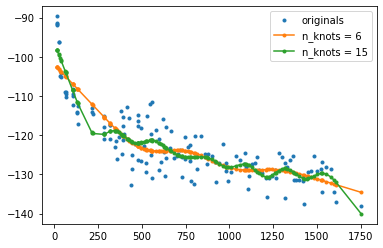

In [38]:
df = pd.concat([
    rssi_1_exp4,
#     rssi_1_exp5,
#     rssi_1_exp6,
#     rssi_2_exp4,
#     rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True).groupby('distance')['RSSI'].mean()

print(df)
# for i in range(len(freqs)):
#     for sf in sorted(df.SF.unique()):
        
x = np.array(df.index.to_list())
y = np.array(df.values)
# print(x)
# print(y)
def func(x):
    return 1/(1+25*x**2)

# make example data
# x = np.linspace(-1,1,300)
# print(x)
# y = func(x) + np.random.normal(0, 0.2, len(x))

# The number of knots can be used to control the amount of smoothness
model_6 = get_natural_cubic_spline_model(x, y, minval=min(x), maxval=max(x), n_knots=6)
model_15 = get_natural_cubic_spline_model(x, y, minval=min(x), maxval=max(x), n_knots=15)
y_est_6 = model_6.predict(x)
y_est_15 = model_15.predict(x)


plt.plot(x, y, ls='', marker='.', label='originals')
plt.plot(x, y_est_6, marker='.', label='n_knots = 6')
plt.plot(x, y_est_15, marker='.', label='n_knots = 15')
plt.legend(); plt.show()

In [59]:
x = np.ones(10)*-2
a = 1
b = 4

print((a - x) / b)

print(10**x)

print(10 ** ((a - x) / b))

[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[5.62341325 5.62341325 5.62341325 5.62341325 5.62341325 5.62341325
 5.62341325 5.62341325 5.62341325 5.62341325]


--- Parameters ---
n: 2.0061923281183476
C: -68.72146879292856
--- MSRE ---
0.04774898329595815
--- Plots ---


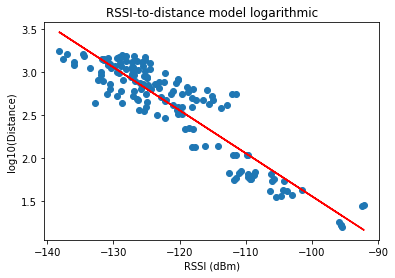

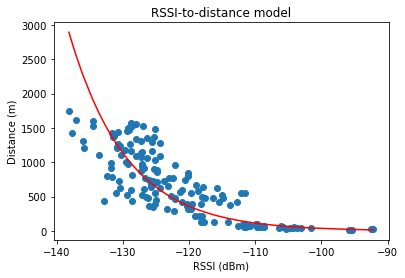

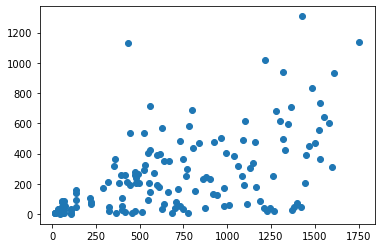

In [24]:
from sklearn.linear_model import LinearRegression

df = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
#     rssi_2_exp4,
#     rssi_2_exp6,
    rssi_3_exp4,
#     rssi_3_exp6
]).sort_values(by=['distance'], ignore_index=True)
df2 = df.groupby('distance')['RSSI'].mean()

# Reformat data
d, rssi = df2.index.tolist(), df2.values.tolist()
X = df2.values.reshape(-1, 1)
Y = (np.log10(df2.index.to_series().values)).reshape(-1, 1)

# Train model
linear_regressor = LinearRegression()  # create object for the class
reg = linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
b = reg.coef_[0][0]
a = reg.intercept_[0]
n = -1 / (10*b)
C = 10 * n * a
print("--- Parameters ---")
print("n: " + str(n))
print("C: " + str(C))
print("--- MSRE ---")
print(mean_squared_error(Y, Y_pred))
print("--- Plots ---")
# Plot logarithmic
plt.title("RSSI-to-distance model logarithmic")
plt.xlabel("RSSI (dBm)")
plt.ylabel("log10(Distance)")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


# Plot base
plt.title("RSSI-to-distance model")
plt.xlabel("RSSI (dBm)")
plt.ylabel("Distance (m)")

X2 = df2.values
Y2 = 10 ** ((C - X2) / (10*n))
zipped = list(zip(*sorted(zip(X2, Y2), key=lambda x: x[1])))
X3, Y3 = zipped[0], zipped[1]
plt.plot(X3, Y3, color='red')
plt.scatter(X2, d)
plt.show()

X = df2.values.reshape(-1, 1)
Y = (df2.index.to_series().values).reshape(-1, 1)
plt.scatter(Y, np.abs(Y - (10 ** ((C - X) / (10*n)))))
plt.show()

--- Parameters ---
n: 2.352401153454318
C: -61.7042615441107
--- MSRE ---
0.05195200880019466
--- Plots ---


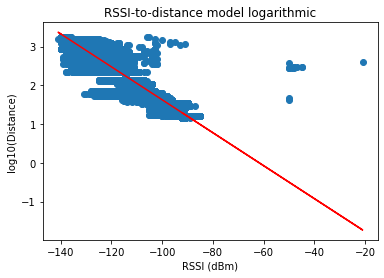

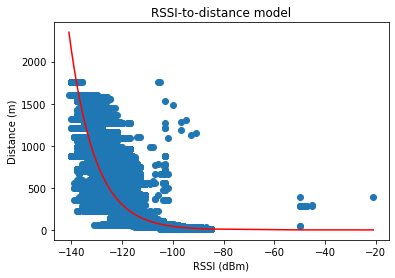

In [37]:
from sklearn.linear_model import LinearRegression

df2 = pd.concat([
    rssi_1_exp4,
    rssi_1_exp5,
    rssi_1_exp6,
    rssi_2_exp4,
    rssi_2_exp6,
    rssi_3_exp4,
    rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

# Reformat data
X = df2['RSSI'].to_numpy().reshape(-1, 1)
Y = (np.log10(df2['distance'].to_numpy())).reshape(-1, 1)

# Train model
linear_regressor = LinearRegression()  # create object for the class
reg = linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
b = reg.coef_[0][0]
a = reg.intercept_[0]
n = -1 / (10*b)
C = 10 * n * a
print("--- Parameters ---")
print("n: " + str(n))
print("C: " + str(C))
print("--- MSRE ---")
print(mean_squared_error(Y, Y_pred))
print("--- Plots ---")
# Plot logarithmic
plt.title("RSSI-to-distance model logarithmic")
plt.xlabel("RSSI (dBm)")
plt.ylabel("log10(Distance)")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


# Plot base
plt.title("RSSI-to-distance model")
plt.xlabel("RSSI (dBm)")
plt.ylabel("Distance (m)")

Y2 = 10 ** ((C - X) / (10*n))
zipped = list(zip(*sorted(zip(X, Y2), key=lambda x: x[1])))
X3, Y3 = zipped[0], zipped[1]
plt.plot(X3, Y3, color='red')
plt.scatter(X, df2['distance'].to_numpy().reshape(-1,1))
plt.show()

--- Parameters ---
n: 2.3522774112328393
C: -61.70707025980334
--- MSRE ---
0.05171150873483397
--- Plots ---


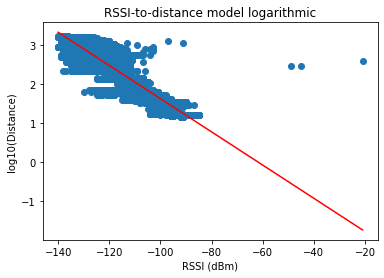

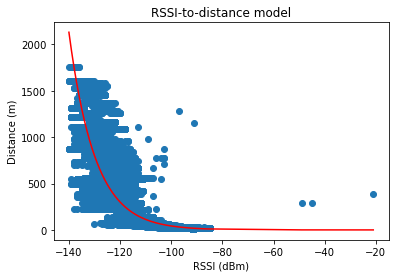

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create bins in df and label them
df3 = df.copy(deep=True)
bins = [0.0, 25, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750, 1000, 1250, 1500, 1750, np.inf]
labels = [str(i) for i in range(1, len(bins))]
df3['Class'] = pd.cut(df3['distance'], bins=bins, labels=labels)

# Split training and test data
train, test = train_test_split(df3, test_size=0.3, stratify=df3['Class'])
x_train = train['RSSI'].to_numpy().reshape(-1, 1)
x_test = test['RSSI'].to_numpy().reshape(-1, 1)
y_train = train['distance'].to_numpy().reshape(-1, 1)
y_test = test['distance'].to_numpy().reshape(-1, 1)

# Train model
linear_regressor = LinearRegression()  # create object for the class
reg = linear_regressor.fit(x_train, np.log10(y_train))  # perform linear regression
# Predict
Y_pred = linear_regressor.predict(x_test)  # make predictions
# Zip unzip it
zipped = list(zip(*sorted(zip(x_test, Y_pred), key=lambda x: x[1])))
X3, Y3 = zipped[0], zipped[1]
b = reg.coef_[0][0]
a = reg.intercept_[0]
n = -1 / (10*b)
C = 10 * n * a
print("--- Parameters ---")
print("n: " + str(n))
print("C: " + str(C))
print("--- MSRE ---")
print(mean_squared_error(np.log10(y_test), Y_pred))
print("--- Plots ---")

# Plot logarithmic
plt.title("RSSI-to-distance model logarithmic")
plt.xlabel("RSSI (dBm)")
plt.ylabel("log10(Distance)")
plt.scatter(x_test, np.log10(y_test))
plt.plot(X3, Y3, color='red')
plt.show()

# Plot base
Y2 = 10 ** ((C - X3) / (10*n))
plt.title("RSSI-to-distance model")
plt.xlabel("RSSI (dBm)")
plt.ylabel("Distance (m)")
plt.scatter(x_test, y_test)
plt.plot(X3, Y2, color='red')
plt.show()

In [ ]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")

df = pd.concat([rssi_3_exp4, rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)

for sf in range(7,12):
    df2 = df.loc[df['SF'] == sf].groupby('distance')['RSSI'].mean()
    df2.plot(style='.')

    d, rssi = df2.index.tolist(), df2.values.tolist()
    popt = np.polyfit(d, rssi, 2)
    xn = np.linspace(min(d), max(d), len(d))
    yn = np.polyval(popt, xn)
    plt.plot(xn, yn, label="SF: " + str(sf))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.semilogx()